26 de febrero 2024.

Nancy Woolrich Sorroza

# Tarea 03 - Ajuste de curvas

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [29]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

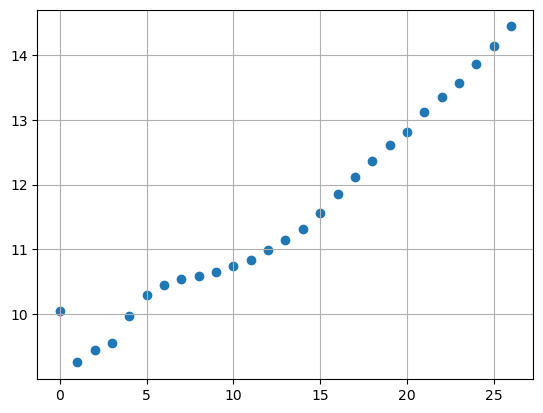

In [30]:
m=len(data)

xn=np.linspace(0, m-1, m)

plt.figure()
plt.scatter(xn, data)
plt.grid()

In [31]:
ones=np.ones([m, 1])
x_factor=np.reshape(xn,[m,1])

X=np.hstack((ones,x_factor))
y_vector=np.reshape(data, [m, 1])

def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return ( error.T @ error)[0][0]



### Polinomio de primer grado

$$\hat y(x)=\beta_0+\beta_1x$$

In [35]:
beta=np.random.rand(2)
x_factor=np.reshape(x, [m, 1])
X=np.hstack((ones, x_factor))
pg=opt.minimize(funcion_de_costo, beta, args=(X, y_vector))


### Polinomio de segundo grado

$$\hat y(x)= \beta_0 + \beta_1 x + \beta_2 x^2$$

In [34]:
beta=np.random.rand(3)
x2_factor=np.reshape(x**2, [m, 1])
X2=np.hstack((ones, x_factor, x2_factor))
sg=opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

### Polinomio de tercer grado

$$\hat y(x)= \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$$

In [36]:
beta=np.random.rand(4)
x3_factor=np.reshape(x**3, [m, 1])
X3=np.hstack((ones, x_factor, x2_factor, x3_factor))
tg=opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))


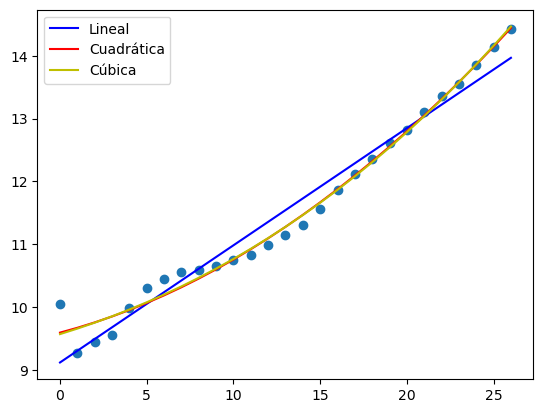

In [39]:
plt.figure()
plt.scatter(x, data)
plt.plot(x, X @ np.reshape(pg.x, [2, 1]), "b" ,label="Lineal")
plt.plot(x, X2 @ np.reshape(sg.x, [3, 1]), "r", label="Cuadrática")
plt.plot(x, X3 @ np.reshape(tg.x, [4, 1]), "y", label="Cúbica")
plt.legend(loc="best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [42]:
import pandas as pd
datap=pd.read_csv("population_data.csv")
poblacion = np.array(datap["Poblacion"])
nacimientos = np.array(datap["Nacimientos"])
datap

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


## 1.   y = Población

### 1.1 Gráfico Años vs Población

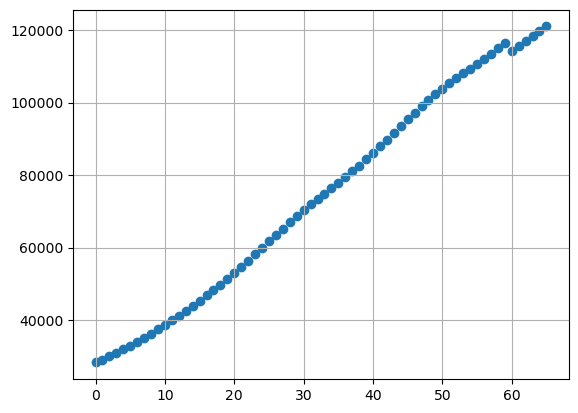

In [58]:
m=len(poblacion)

xn=np.linspace(0, m-1, m)

plt.figure()
plt.scatter(xn, poblacion)
plt.grid()


### 1.2 Ajuste de polinomios

In [55]:
def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return (error.T @ error)[0][0]


onesp=np.ones([m, 1])
y_vectorp=np.reshape(poblacion, [m, 1])


#Ajuste polinomio de primer grado
# b0 + b1*x

beta=np.random.rand(2)
x_factorp=np.reshape(xn, [m, 1])
Xp=np.hstack((onesp, x_factorp))
pgp=opt.minimize(funcion_de_costo, beta, args=(Xp, y_vectorp))


#Ajuste polinomio de segundo grado
#b0 + b1*x + b2*x^2

beta=np.random.rand(3)
x2_factorp=np.reshape(xn**2, [m, 1])
X2p=np.hstack((onesp, x_factorp, x2_factorp) )
sgp=opt.minimize(funcion_de_costo, beta, args=(X2p, y_vectorp))
       
    
#Ajuste polinomio de primer grado
#b0 + b1*x + b2*x^2 + b3*x^3
                                                                                                                         
beta=np.random.rand(4)
x3_factorp=np.reshape(xn**3, [m, 1])
X3p=np.hstack((onesp, x_factorp, x2_factorp, x3_factorp) )
tgp=opt.minimize(funcion_de_costo, beta, args=(X3p, y_vectorp))


### 1.3 Gráfico con ajuste de polinomios Años vs Población

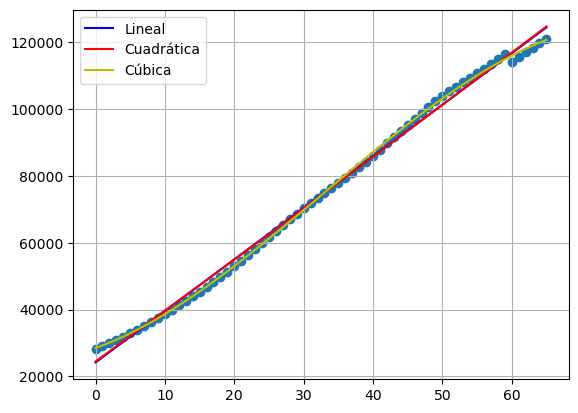

In [52]:
plt.figure()
plt.grid()
plt.scatter(xn, poblacion)
plt.plot(xn, Xp @ np.reshape(pgp.x, [2, 1]), "b" ,label="Lineal")
plt.plot(xn, X2p @ np.reshape(sgp.x, [3, 1]), "r", label="Cuadrática")
plt.plot(xn, X3p @ np.reshape(tgp.x, [4, 1]), "y", label="Cúbica")
plt.legend(loc = "best")


### 1.1 Gráfico de erro Años vs Población

<BarContainer object of 3 artists>

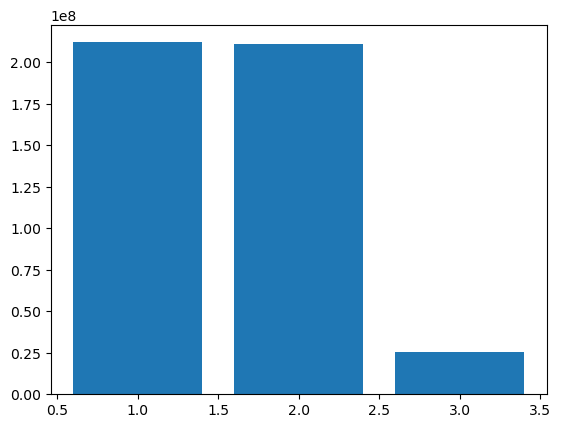

In [53]:
plt.figure()
plt.bar([1, 2, 3], [pgp.fun, sgp.fun, tgp.fun])

In [54]:
tgp

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 25240442.639457464
        x: [ 2.848e+04  7.391e+02  3.056e+01 -3.092e-01]
      nit: 5
      jac: [-2.500e-01 -2.500e-01  2.750e+00  1.695e+02]
 hess_inv: [[ 1.084e-01 -1.241e-02  3.788e-04 -3.373e-06]
            [-1.241e-02  1.954e-03 -6.782e-05  6.476e-07]
            [ 3.788e-04 -6.782e-05  2.519e-06 -2.510e-08]
            [-3.373e-06  6.476e-07 -2.510e-08  2.574e-10]]
     nfev: 242
     njev: 46

El mejor ajuste de polinomio es de tercer grado.

## 2. y = Nacimientos

### 2.1 Ajuste de polinomios


In [59]:
def funcion_de_costo(beta, X, y):
    m, n=X.shape
    beta=np.reshape(beta, [n, 1])
    y_pred=X @ beta
    error=y_pred - y
    return (error.T @ error)[0][0]


onesn=np.ones([m, 1])
y_vectorn=np.reshape(nacimientos, [m, 1])


#Ajuste polinomio de primer grado
# b0 + b1*x

beta=np.random.rand(2)
x_factorn=np.reshape(xn, [m, 1])
Xn=np.hstack((onesn, x_factorn))
pgn=opt.minimize(funcion_de_costo, beta, args=(Xn, y_vectorn))


#Ajuste polinomio de segundo grado
#b0 + b1*x + b2*x^2

beta=np.random.rand(3)
x2_factorn=np.reshape(xn**2, [m, 1])
X2n=np.hstack((onesn, x_factorn, x2_factorn) )
sgn=opt.minimize(funcion_de_costo, beta, args=(X2n, y_vectorn))
       
    
#Ajuste polinomio de primer grado
#b0 + b1*x + b2*x^2 + b3*x^3
                                                                                                                         
beta=np.random.rand(4)
x3_factorn=np.reshape(xn**3, [m, 1])
X3n=np.hstack((onesn, x_factorn, x2_factorn, x3_factorn) )
tgn=opt.minimize(funcion_de_costo, beta, args=(X3n, y_vectorn))


### 2.2 Gráfico con ajuste de polinomios Años vs Nacimientos

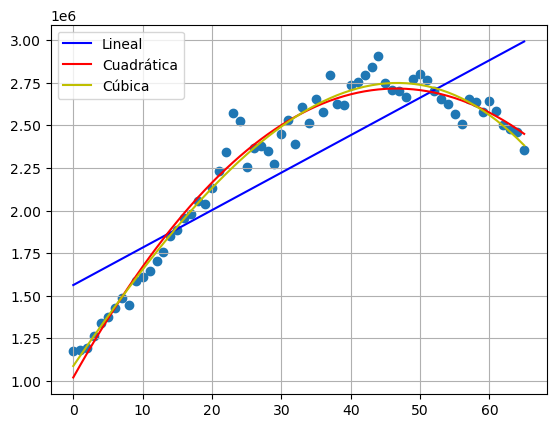

In [60]:
plt.figure()
plt.grid()
plt.scatter(xn, nacimientos)
plt.plot(xn, Xn @ np.reshape(pgn.x, [2, 1]), "b" ,label="Lineal")
plt.plot(xn, X2n @ np.reshape(sgn.x, [3, 1]), "r", label="Cuadrática")
plt.plot(xn, X3n @ np.reshape(tgn.x, [4, 1]), "y", label="Cúbica")
plt.legend(loc = "best")

### 2.3 Gráfico de error Años vs Nacimientos

<BarContainer object of 3 artists>

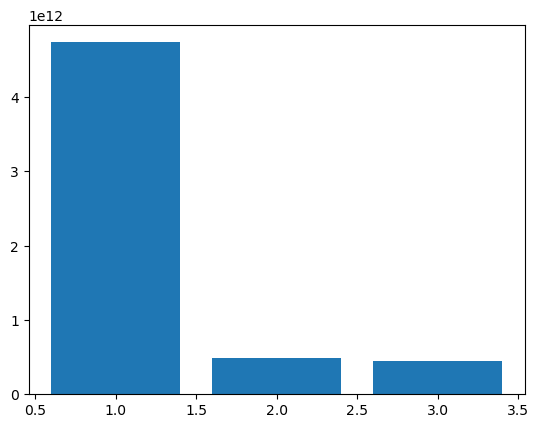

In [61]:
plt.figure()
plt.bar([1, 2, 3], [pgn.fun, sgn.fun, tgn.fun])

In [64]:
tgn

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 441782318899.21375
        x: [ 1.088e+06  5.987e+04 -2.812e+02 -5.132e+00]
      nit: 11
      jac: [ 0.000e+00  0.000e+00 -4.096e+03 -1.925e+05]
 hess_inv: [[ 4.346e-02 -1.806e-03  1.374e-10  3.279e-07]
            [-1.806e-03  1.081e-04 -1.209e-10 -2.451e-08]
            [ 1.374e-10 -1.209e-10  6.497e-12 -7.789e-14]
            [ 3.279e-07 -2.451e-08 -7.789e-14  6.732e-12]]
     nfev: 370
     njev: 72

El mejor ajuste de polinomio es de tercer grado.